In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import DecisionBoundaryDisplay

In [2]:
# Load dataset
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
# Linear SVM
linear_svm = SVC(kernel='linear', C=1.0, random_state=42)
linear_svm.fit(X_train, y_train)

# Predictions
y_pred_linear = linear_svm.predict(X_test)

# Evaluation
print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_linear))
print(classification_report(y_test, y_pred_linear))

Linear SVM Accuracy: 0.9766081871345029
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [4]:
# RBF SVM
rbf_svm = SVC(kernel='rbf', gamma='scale', C=1.0, random_state=42)
rbf_svm.fit(X_train, y_train)

# Predictions
y_pred_rbf = rbf_svm.predict(X_test)

# Evaluation
print("RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))

RBF SVM Accuracy: 0.9766081871345029
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [5]:
# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1, 10],
    'kernel': ['rbf', 'linear']
}

# Grid search
grid = GridSearchCV(SVC(random_state=42), param_grid, refit=True, cv=5, verbose=2)
grid.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid.best_params_)

# Best estimator
best_svm = grid.best_estimator_
y_pred_best = best_svm.predict(X_test)
print("Best SVM Accuracy:", accuracy_score(y_test, y_pred_best))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=aut

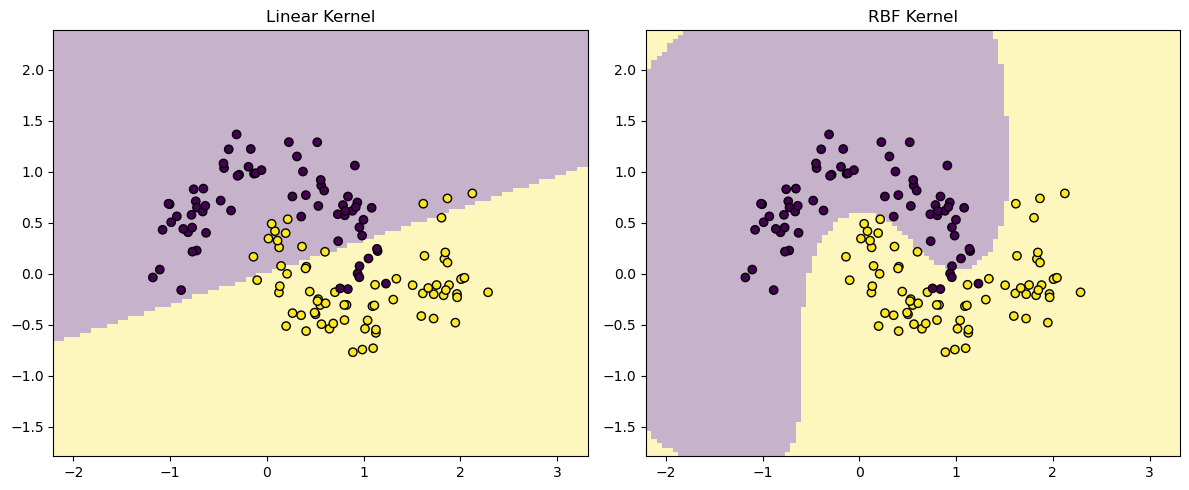

In [6]:
# Create a simple 2D dataset
X, y = datasets.make_moons(n_samples=200, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train linear SVM
linear_svm_2d = SVC(kernel='linear', C=1.0)
linear_svm_2d.fit(X_train, y_train)

# Train RBF SVM
rbf_svm_2d = SVC(kernel='rbf', gamma='scale', C=1.0)
rbf_svm_2d.fit(X_train, y_train)

# Plot decision boundaries
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Linear kernel
DecisionBoundaryDisplay.from_estimator(
    linear_svm_2d,
    X_train,
    ax=ax[0],
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    alpha=0.3,
)
ax[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors="k")
ax[0].set_title("Linear Kernel")

# RBF kernel
DecisionBoundaryDisplay.from_estimator(
    rbf_svm_2d,
    X_train,
    ax=ax[1],
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    alpha=0.3,
)
ax[1].scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors="k")
ax[1].set_title("RBF Kernel")

plt.tight_layout()
plt.show()

In [7]:
from sklearn.model_selection import cross_val_score

# Cross-validation for linear SVM
linear_scores = cross_val_score(linear_svm, X_train, y_train, cv=5)
print("Linear SVM CV scores:", linear_scores)
print("Mean CV accuracy:", linear_scores.mean())

# Cross-validation for RBF SVM
rbf_scores = cross_val_score(rbf_svm, X_train, y_train, cv=5)
print("RBF SVM CV scores:", rbf_scores)
print("Mean CV accuracy:", rbf_scores.mean())

Linear SVM CV scores: [0.78571429 0.92857143 0.82142857 0.78571429 0.82142857]
Mean CV accuracy: 0.8285714285714285
RBF SVM CV scores: [0.92857143 1.         0.92857143 0.96428571 0.96428571]
Mean CV accuracy: 0.9571428571428571
